<a href="https://colab.research.google.com/github/erkulev/erk/blob/main/%D0%A6%D0%B5%D0%BD%D0%B0_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80_%D0%B0_%D0%B8_%D0%BD%D0%B5%D1%84%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
usd_rate=pd.read_excel("/RC_F01_01_2017_T01_01_2021.xlsx")


usd_rate=pd.read_excel("/RC_F01_01_2017_T01_01_2021.xlsx")

In [ ]:
oil_price=pd.read_excel("/RBRTEd.xls",sheet_name=1,skiprows=2,names=["data","oil_price"])

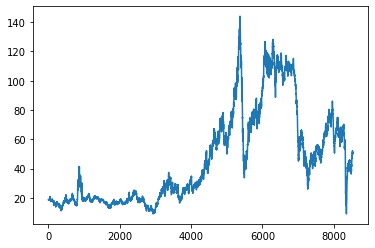

In [ ]:
oil_price["oil_price"].plot()

In [ ]:
df=usd_rate.set_index("data").join(oil_price.set_index("data"))

In [ ]:
df.drop(["nominal","cdx"],inplace=True,axis=1)

In [ ]:
df.fillna(method='ffill',inplace=True)

In [ ]:
df.reset_index(inplace=True)


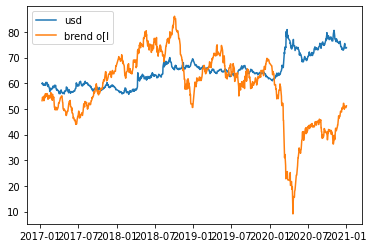

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df["data"],df["curs"],label="usd")
plt.plot(df["data"],df["oil_price"],label="brend o[l")
plt.legend()

In [ ]:
df["year"]=df["data"].dt.year
df["month"]=df["data"].dt.month
df["weekday"]=df["data"].dt.weekday
df

,data,curs,oil_price,year,month,weekday
0,2017-01-10,59.8961,53.20,2017,1,1
1,2017-01-11,59.9533,53.61,2017,1,2
2,2017-01-12,60.1614,54.51,2017,1,3
3,2017-01-13,59.4978,54.37,2017,1,4
4,2017-01-14,59.3700,54.37,2017,1,5
...,...,...,...,...,...,...
979,2020-12-26,73.6921,50.88,2020,12,5
980,2020-12-29,73.7175,50.44,2020,12,1
981,2020-12-30,73.6567,50.74,2020,12,2
982,2020-12-31,73.8757,51.22,2020,12,3


In [ ]:
past_days=7
for day in range(past_days):
    d=day+1
    df[f"usd_lag_{d}"]=df["curs"].shift(d)
    df[f"oil_price_lag_{d}"]=df["oil_price"].shift(d)
df

,data,curs,oil_price,year,month,weekday,usd_lag_1,oil_price_lag_1,usd_lag_2,oil_price_lag_2,usd_lag_3,oil_price_lag_3,usd_lag_4,oil_price_lag_4,usd_lag_5,oil_price_lag_5,usd_lag_6,oil_price_lag_6,usd_lag_7,oil_price_lag_7
0,2017-01-10,59.8961,53.20,2017,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-11,59.9533,53.61,2017,1,2,59.8961,53.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-12,60.1614,54.51,2017,1,3,59.9533,53.61,59.8961,53.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-13,59.4978,54.37,2017,1,4,60.1614,54.51,59.9533,53.61,59.8961,53.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-14,59.3700,54.37,2017,1,5,59.4978,54.37,60.1614,54.51,59.9533,53.61,59.8961,53.20,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,2020-12-26,73.6921,50.88,2020,12,5,74.8392,50.88,75.4571,50.88,75.3498,51.05,74.6721,49.88,73.3155,52.17,72.9781,52.17,73.4201,51.20
980,2020-12-29,73.7175,50.44,2020,12,1,73.6921,50.88,74.8392,50.88,75.4571,50.88,75.3498,51.05,74.6721,49.88,73.3155,52.17,72.9781,52.17
981,2020-12-30,73.6567,50.74,2020,12,2,73.7175,50.44,73.6921,50.88,74.8392,50.88,75.4571,50.88,75.3498,51.05,74.6721,49.88,73.3155,52.17
982,2020-12-31,73.8757,51.22,2020,12,3,73.6567,50.74,73.7175,50.44,73.6921,50.88,74.8392,50.88,75.4571,50.88,75.3498,51.05,74.6721,49.88


In [ ]:
df[f"usd_week"]=df["curs"].shift(1).rolling(window=7).median()
df[f"oil_week"]=df["oil_price"].shift(1).rolling(window=7).median()


final_df.drop(["data","oil_price"],inplace=True)


In [ ]:
final_df.drop(["data","oil_price"],inplace=True)

NameError: ignored

In [ ]:
final_df.dropna(inplace=True)

final_df.reset_index(inplace=True)

In [ ]:
final_df=pd.get_dummies(df,columns=["year","month","weekday"])
final_df.drop(["data","oil_price"],axis=1,inplace=True)
final_df

,curs,usd_lag_1,oil_price_lag_1,usd_lag_2,oil_price_lag_2,usd_lag_3,oil_price_lag_3,usd_lag_4,oil_price_lag_4,usd_lag_5,oil_price_lag_5,usd_lag_6,oil_price_lag_6,usd_lag_7,oil_price_lag_7,usd_week,oil_week,year_2017,year_2018,year_2019,year_2020,year_2021,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,59.8961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,59.9533,59.8961,53.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,60.1614,59.9533,53.61,59.8961,53.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,59.4978,60.1614,54.51,59.9533,53.61,59.8961,53.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,59.3700,59.4978,54.37,60.1614,54.51,59.9533,53.61,59.8961,53.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,73.6921,74.8392,50.88,75.4571,50.88,75.3498,51.05,74.6721,49.88,73.3155,52.17,72.9781,52.17,73.4201,51.20,74.6721,51.05,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
980,73.7175,73.6921,50.88,74.8392,50.88,75.4571,50.88,75.3498,51.05,74.6721,49.88,73.3155,52.17,72.9781,52.17,74.6721,50.88,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
981,73.6567,73.7175,50.44,73.6921,50.88,74.8392,50.88,75.4571,50.88,75.3498,51.05,74.6721,49.88,73.3155,52.17,74.6721,50.88,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
982,73.8757,73.6567,50.74,73.7175,50.44,73.6921,50.88,74.8392,50.88,75.4571,50.88,75.3498,51.05,74.6721,49.88,74.6721,50.88,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
X=final_df.drop("curs",axis=1)

In [ ]:
y=final_df["curs"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction=model.predict(X_test)

In [ ]:
mae=mean_absolute_error(y_test,prediction)
print(mae)

0.35151451022801156


In [ ]:
pd.DataFrame(data=[model.coef_],columns=X.columns).T

,0
level_0,0.000545
index,0.000545
usd_lag_1,0.999611
usd_lag_2,-0.048309
usd_lag_3,0.118131
usd_lag_4,-0.017472
usd_lag_5,-0.001631
usd_lag_6,0.015265
usd_lag_7,0.029754
oil_price_lag_1,-0.028782


0.35092579374733635


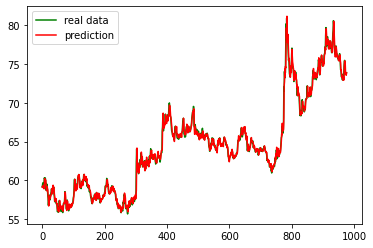

In [ ]:
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
mae=mean_absolute_error(y_test,prediction)
print(mae)
plt.plot(y,label='real data',color='green')
plt.plot(model.predict(X),label='prediction',color='red')
plt.legend()


In [ ]:
pd.DataFrame(data=[model.coef_],columns=X.columns).T


,0
level_0,0.000290
index,0.000290
usd_lag_1,0.992367
usd_lag_2,-0.040868
usd_lag_3,0.113779
usd_lag_4,-0.019338
usd_lag_5,-0.002171
usd_lag_6,0.014463
usd_lag_7,0.028867
oil_price_lag_1,-0.029206


0.43631953240408206


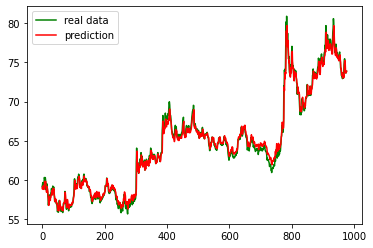

In [ ]:
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
mae=mean_absolute_error(y_test,prediction)
print(mae)
plt.plot(y,label='real data',color='green')
plt.plot(model.predict(X),label='prediction',color='red')
plt.legend()

0.35686670800530557


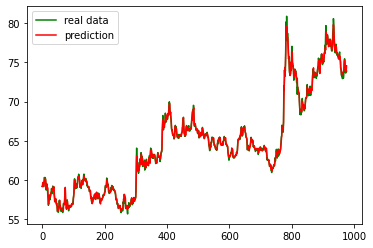

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
mae=mean_absolute_error(y_test,prediction)
print(mae)
plt.plot(y,label='real data',color='green')
plt.plot(model.predict(X),label='prediction',color='red')
plt.legend()

0.7082310827053605


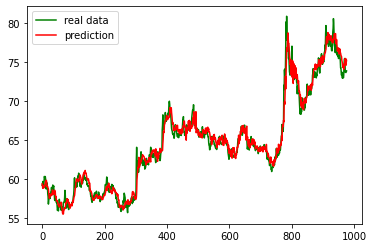

In [ ]:
from sklearn.neural_network import MLPRegressor
model=MLPRegressor()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
mae=mean_absolute_error(y_test,prediction)
print(mae)
plt.plot(y,label='real data',color='green')
plt.plot(model.predict(X),label='prediction',color='red')
plt.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR


In [ ]:
model=LinearSVR(random_state=42)
param_gred={
    "C":[0.01,0.1,0.5,2.0],
    "loss":["epsilon_insensitive","squard_epsilon_insensitive"],
    "max_iter":[1000.0,2000.0]
}
gs=GridSearchCV(model,param_gred,scoring="neg_mean_absolute_error",n_jobs=-1,cv=5)

In [ ]:
gs.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=42, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 2.0],
                         'loss': ['epsilon_insensitive',
                                  'squard_epsilon_insensitive'],
                         'max_iter': [1000.0, 2000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [ ]:
gs.best_params_
gs.best_score_

-0.4189272433874801

In [ ]:
model= gs.best_estimator_

LinearSVR(C=0.1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=2000.0,
          random_state=42, tol=0.0001, verbose=0)

0.551863463595528


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


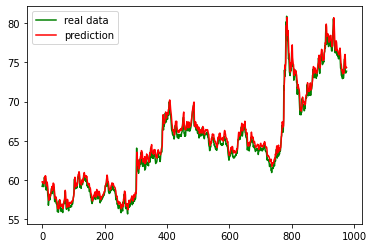

In [ ]:
model.fit(X_train,y_train)
prediction=model.predict(X_test)
mae=mean_absolute_error(y_test,prediction)
print(mae)
plt.plot(y,label='real data',color='green')
plt.plot(model.predict(X),label='prediction',color='red')
plt.legend()

In [ ]:
import pickle
pickle.dump(model,open("LinearSVR.model","wb"))

In [ ]:
load_model=pickle.load(open("LinearSVR.model","rb"))